In [1]:
import polars as pl
import matplotlib.pyplot as plt
from itertools import product

In [2]:
columns = pl.read_parquet("_data/ffffffffff.parquet").columns
df = pl.concat([
    (
        pl.read_parquet(f"_data/{''.join(sequence)}.parquet")
        .select(columns)
        .with_columns(
            pl.lit(''.join(sequence)).alias("sequence"),
            pl.lit(len([1 for i in sequence if i == "t"])).alias("turn_num")
        )
    )
    for sequence in product("ft", repeat=10)
])

In [7]:
len(df) / 1e6

234.662231

In [4]:
grouped = df.group_by("turn_num").agg(pl.col("player_1_wins").mean(), pl.len()).sort("turn_num")
with pl.Config(tbl_rows=100):
    display(grouped)

turn_num,player_1_wins,len
i32,f64,u32
0,0.0,1
1,0.0,100
2,0.296296,4050
3,0.012361,86400
4,0.74513,1058400
5,0.109351,7620480
6,0.76421,31752000
7,0.231101,72576000
8,0.672222,81648000


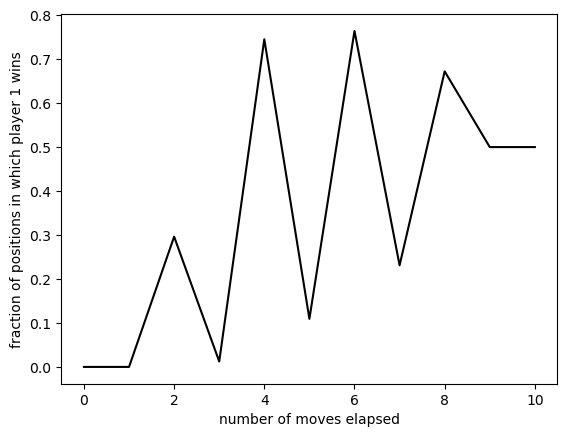

In [5]:
fig, ax = plt.subplots()
ax.plot(grouped["player_1_wins"], color="black")
ax.set_xlabel("number of moves elapsed")
ax.set_ylabel("fraction of positions in which player 1 wins")
plt.show()